In [17]:
import pandas as pd

# Load the csv file into a pandas dataframe
df_author_jan = pd.read_csv('Author_df_jan.csv')
df_author_apr = pd.read_csv('Author_df_apr.csv')

# Display the first few rows of the dataframe
print(df_author_jan.head())
print(df_author_apr.head())

              authorId   authorUniqueId  \
0  6755279996182348805    habloconpabl0   
1  7008216250564805637  alitravelsbroke   
2  6747770185614312453     kristinacors   
3  6764845416200307717      dashakofman   
4  7175147257800639494        paniluiza   

                                        avatarLarger  authorDiggCount  \
0  https://p16-sign.tiktokcdn-us.com/tos-useast5-...            21000   
1  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...             1937   
2  https://p16-sign-va.tiktokcdn.com/musically-ma...            10300   
3  https://p16-sign.tiktokcdn-us.com/tos-useast5-...             1395   
4  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...               58   

   authorFollowerCount  authorFollowingCount  authorVideoCount  \
0                 5970                   517               249   
1               167100                   151               212   
2               765600                  1118               952   
3                45500                

In [18]:
# Calculating 'Reach' metric for two datasets

df_author_jan['authorReach'] = df_author_jan['authorFollowerCount'] + df_author_jan['authorHeartCount'] + df_author_jan['authorVideoCount']

df_author_apr['authorReach'] = df_author_apr['authorFollowerCount'] + df_author_apr['authorHeartCount'] + df_author_apr['authorVideoCount']


In [14]:
#identifying the outliers in JAN dataset using the IQR method 

Q1 = df_author_jan['authorReach'].quantile(0.25)
Q3 = df_author_jan['authorReach'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_author_jan[(df_author_jan['authorReach'] < lower_bound) | (df_author_jan['authorReach'] > upper_bound)]

len(outliers)

355

In [19]:
#identifying the outliers in APR dataset using the IQR method 

Q1 = df_author_apr['authorReach'].quantile(0.25)
Q3 = df_author_apr['authorReach'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_author_apr[(df_author_apr['authorReach'] < lower_bound) | (df_author_apr['authorReach'] > upper_bound)]

len(outliers)

447

In [20]:
#cap the values at the upper bound calculated with the IQR method

df_author_jan['authorReach'] = df_author_jan['authorReach'].clip(upper=upper_bound)
df_author_apr['authorReach'] = df_author_apr['authorReach'].clip(upper=upper_bound)

In [21]:
# Define the boundaries for each tier
bins = [0, 10000, 100000, float('inf')]

# Define the labels for each tier
labels = ['Low', 'Medium', 'High']

# Create a new column called 'PopularityTier'
df_author_jan['PopularityTier'] = pd.cut(df_author_jan['authorReach'], bins=bins, labels=labels)
df_author_apr['PopularityTier'] = pd.cut(df_author_apr['authorReach'], bins=bins, labels=labels)

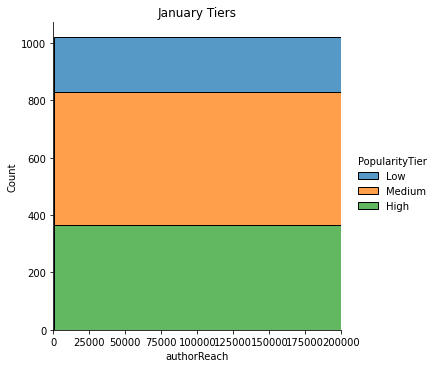

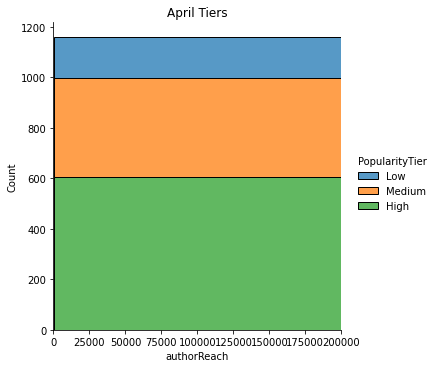

In [23]:
#Visualizing tier - distribution of the data frame

import seaborn as sns
import matplotlib.pyplot as plt

# Plot for January
sns.displot(df_author_jan, x='authorReach', hue='PopularityTier', multiple='stack')
plt.title('January Tiers')
plt.xlim([0, 200000])
plt.show()

# Plot for April
sns.displot(df_author_apr, x='authorReach', hue='PopularityTier', multiple='stack')
plt.title('April Tiers')
plt.xlim([0, 200000])
plt.show()



In [ ]:
# Convert output of describe() to a dataframe for 'authorFollowerCount_jan'
stats_jan = df_merged_all['authorFollowerCount_jan'].describe().reset_index()
stats_jan.columns = ['Statistic', 'Value']
stats_jan['Value'] = stats_jan['Value'].map('{:,.0f}'.format)

# Convert output of describe() to a dataframe for 'authorFollowerCount_apr'
stats_apr = df_merged_all['authorFollowerCount_apr'].describe().reset_index()
stats_apr.columns = ['Statistic', 'Value']
stats_apr['Value'] = stats_apr['Value'].map('{:,.0f}'.format)

# Print the formatted statistics
print('January:')
print(stats_jan)
print('April:')
print(stats_apr)

In [ ]:
# Count the number of 'authorId' in each tier
tier_counts_jan = df_merged_all['tier_jan'].value_counts()
tier_counts_apr = df_merged_all['tier_apr'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
ax = tier_counts_jan.sort_index().plot(kind='bar', color='skyblue', width=0.4, position=1, label='Jan')
tier_counts_apr.sort_index().plot(kind='bar', color='red', width=0.4, position=0, label='Apr', ax=ax)

# Add a title and labels
plt.xlabel('Tier')
plt.ylabel('Number of Authors')
plt.title('Number of Authors in Each Tier')

# Display the counts above the bars
for i, v in enumerate(tier_counts_jan.sort_index().values):
    plt.text(i-0.1, v, str(v), color='black', ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(tier_counts_apr.sort_index().values):
    plt.text(i+0.1, v, str(v), color='black', ha='center', va='bottom', fontweight='bold')

plt.legend()
# Show the plot
plt.show()


In [ ]:
#sample the same number of rows from each tier in both 'tier_jan' and 'tier_apr

n_samples = 40  # adjust this as needed

# Sample from tier_jan
sample_jan = df_merged_all.groupby('tier_jan').apply(lambda x: x.sample(n_samples) if len(x) > n_samples else x)

# Sample from tier_apr
sample_apr = df_merged_all.groupby('tier_apr').apply(lambda x: x.sample(n_samples) if len(x) > n_samples else x)

# Reset the index
sample_jan.reset_index(drop=True, inplace=True)
sample_apr.reset_index(drop=True, inplace=True)

# Add a new column 'sample_origin' to denote the origin of the sample
sample_jan['sample_origin'] = 'jan'
sample_apr['sample_origin'] = 'apr'

# Now concatenate the two samples into a total sample
total_sample = pd.concat([sample_jan, sample_apr], ignore_index=True)
